We shall conduct some exploratory data analysis on the flights dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
df = pd.read_excel('../Data/Raw/airline_ticket_dataset.xlsx')

# Calculate Price per mile
df['price_per_mile'] = df['fare'] / df['nsmiles']

df.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,...,carrier_low,lf_ms,fare_low,TotalFaredPax_city1,TotalPerLFMkts_city1,TotalPerPrem_city1,TotalFaredPax_city2,TotalPerLFMkts_city2,TotalPerPrem_city2,price_per_mile
0,2025,2,32467,31703,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",1118,17955,208.52,B6,...,B6,0.2551,191.48,4.322090e+06,0.88590,-0.065800,2.978413e+06,0.821150,-0.032867,0.186512
1,2025,2,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,17310,157.68,WN,...,AS,0.1193,140.59,2.822942e+06,0.86508,-0.038060,3.284783e+06,0.880833,-0.051467,0.423871
2,2025,2,32575,31703,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,13648,430.38,DL,...,B6,0.2272,365.63,2.822942e+06,0.86508,-0.038060,2.978413e+06,0.821150,-0.032867,0.171466
3,2025,2,31703,31454,"New York City, NY (Metropolitan Area)","Orlando, FL",989,12627,186.50,B6,...,B6,0.3735,186.10,2.978413e+06,0.82115,-0.032867,8.664260e+06,0.979700,-0.115500,0.188574
4,2025,2,30977,31703,"Chicago, IL","New York City, NY (Metropolitan Area)",773,11284,221.33,UA,...,AA,0.2426,217.36,5.402975e+06,0.77515,-0.007850,2.978413e+06,0.821150,-0.032867,0.286326


First, we'll check correlation between variables

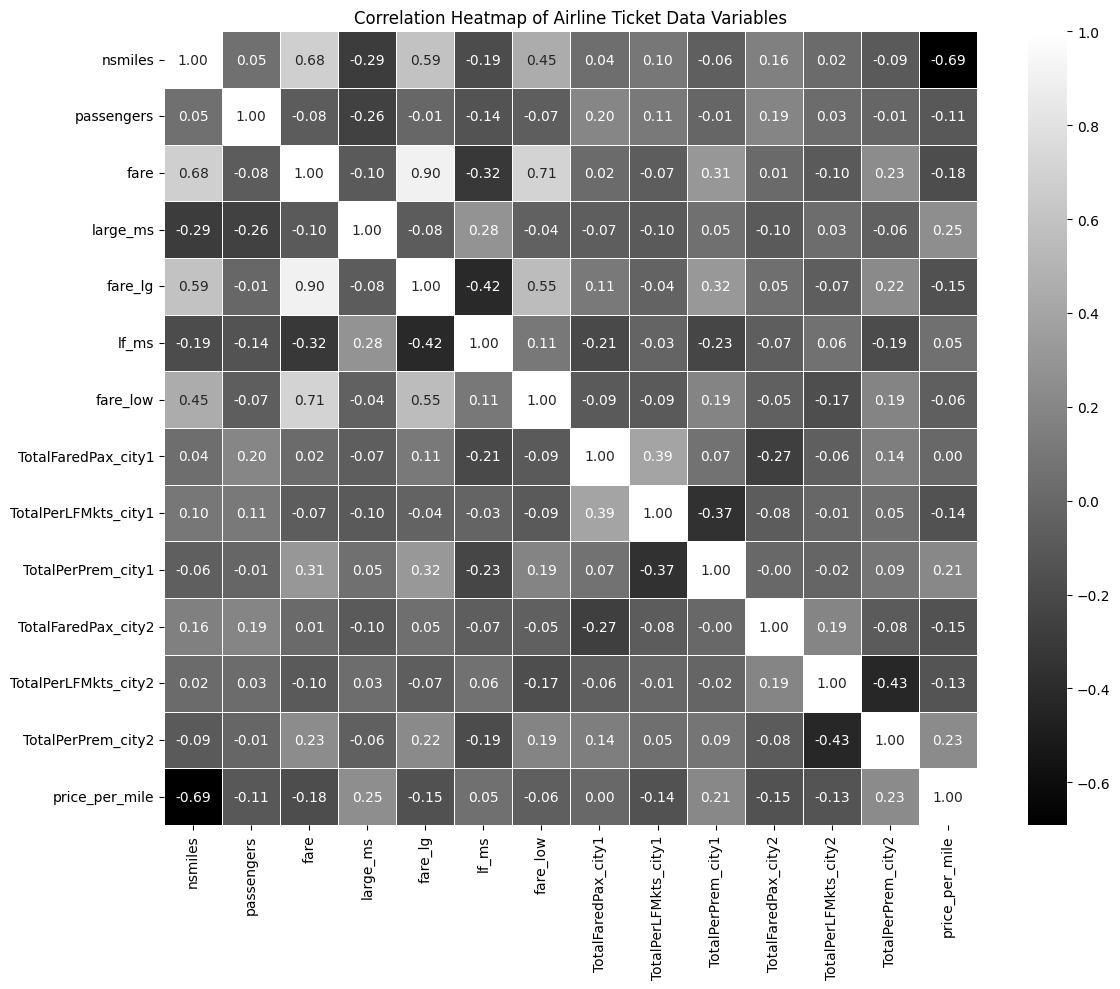

In [7]:
# Correlation Heatmap
# Select numeric columns for correlation analysis, excluding IDs and Year/Quarter
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
cols_to_corr = [col for col in numeric_cols if col not in ['citymarketid_1', 'citymarketid_2', 'Year', 'quarter']]
corr_matrix = df[cols_to_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='gray', linewidths=0.5)
plt.title('Correlation Heatmap of Airline Ticket Data Variables')
plt.tight_layout()

Does higher dominant market share lead to higher prices?

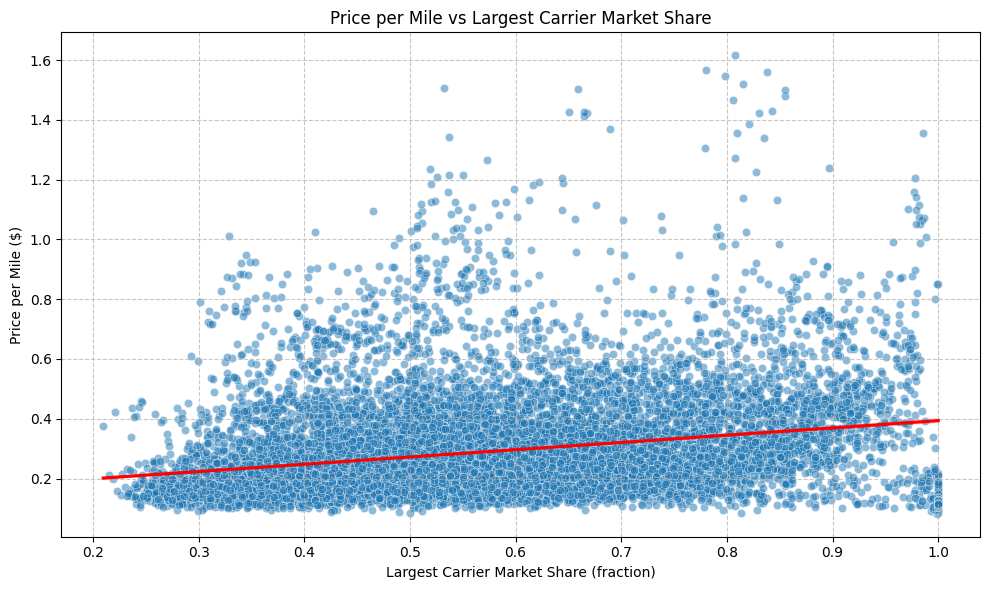

       price_per_mile      large_ms
count    14004.000000  14004.000000
mean         0.288155      0.566322
std          0.167578      0.174240
min          0.081921      0.209700
25%          0.177060      0.431800
50%          0.236546      0.541600
75%          0.345904      0.676725
max          1.616512      1.000000


In [10]:
# 2. Price per Mile against Market Share (large_ms)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='large_ms', y='price_per_mile', alpha=0.5)
# Adding a trend line to visualize the relationship
sns.regplot(data=df, x='large_ms', y='price_per_mile', scatter=False, color='red')
plt.title('Price per Mile vs Largest Carrier Market Share')
plt.xlabel('Largest Carrier Market Share (fraction)')
plt.ylabel('Price per Mile ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display basic statistics for context
print(df[['price_per_mile', 'large_ms']].describe())

We find a positive correlation here. Specifically, the higher the market share of the dominant airline, the higher the average fare of tickets.

Next up, we'll graph fare trends over time to see whether we have to adjust for inflation or other external factors

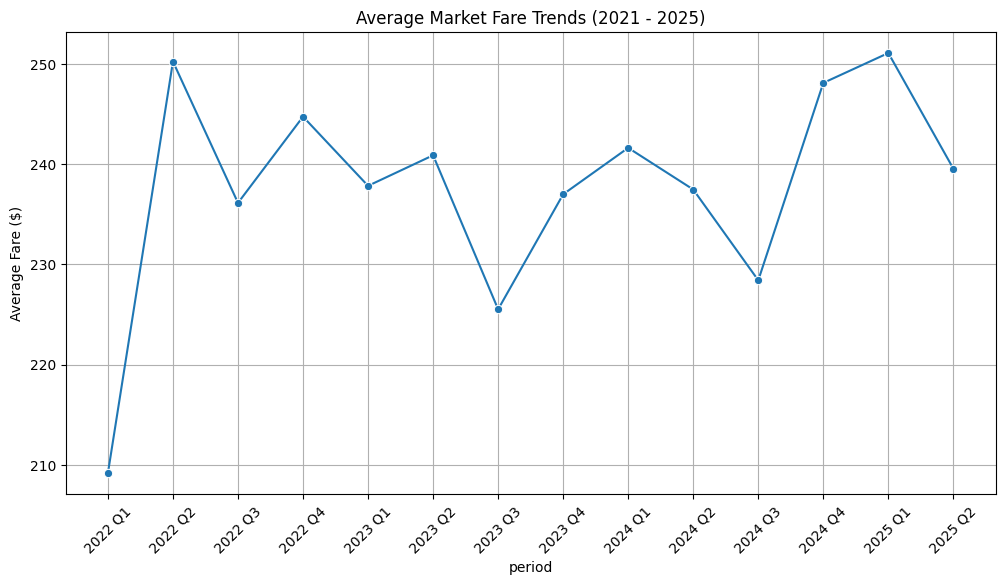

In [ ]:
# Fare trends over time (Year/Quarter)
df['period'] = df['Year'].astype(str) + ' Q' + df['quarter'].astype(str)
fare_trends = df.groupby('period')['fare'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=fare_trends, x='period', y='fare', marker='o')
plt.title('Average Market Fare Trends (2021 - 2025)')
plt.xticks(rotation=45)
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.show()